In [2]:
from tensorflow import keras
import cine
import tube2
import numpy as np
from skimage import transform, util, io as skio, morphology as morpho
from matplotlib import pyplot
import glob

model = keras.models.load_model("model_attempt3")

def get_batch(video, idx):
    zone = []
    for i in range(32):
        frame = video.get_ith_image(idx + i)
        cropped = tube2.tube_crop1(frame)
        shaped = util.img_as_ubyte(transform.resize(cropped, (600,100)))
        zone.append(shaped[...,np.newaxis])
    zone = np.array(zone)
    return zone

2023-04-09 20:51:40.143629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 20:51:40.344014: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-09 20:51:40.377493: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-09 20:51:40.377502: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

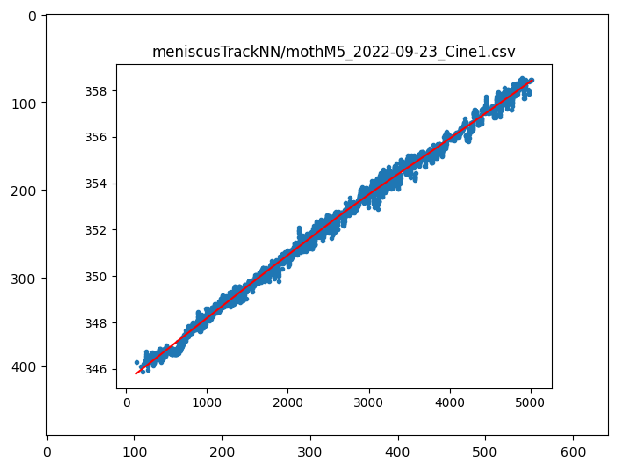

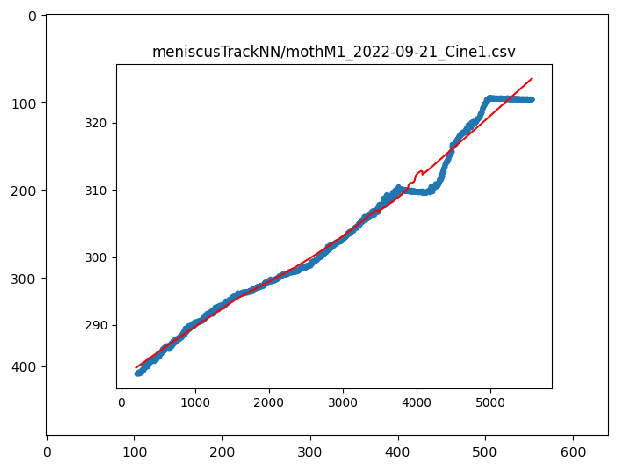

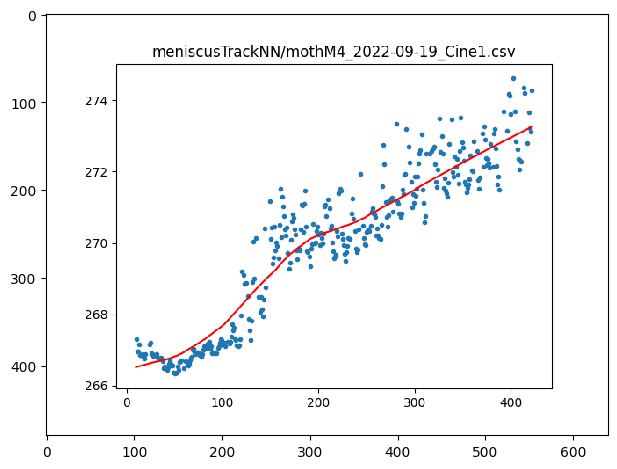

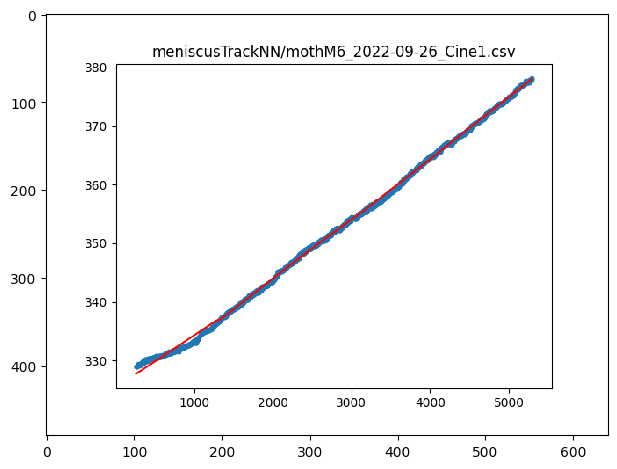

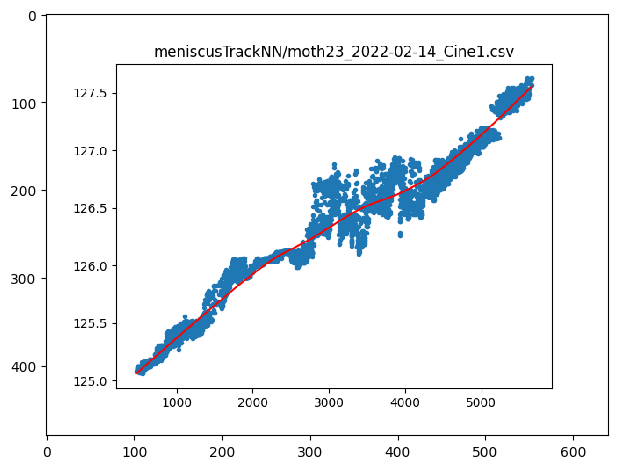

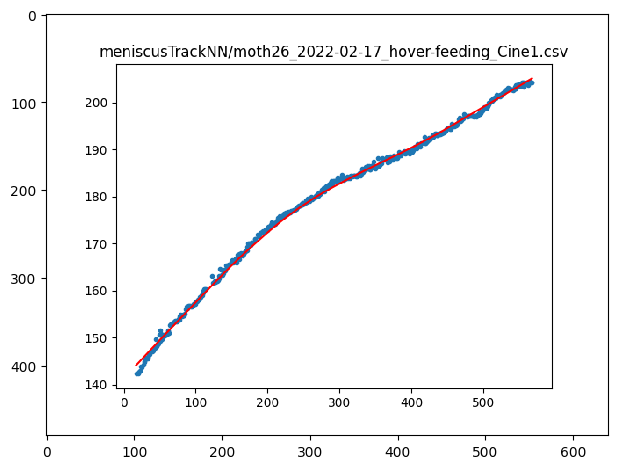

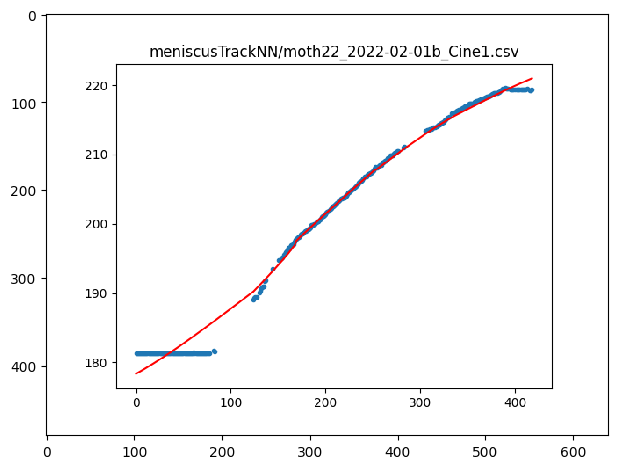

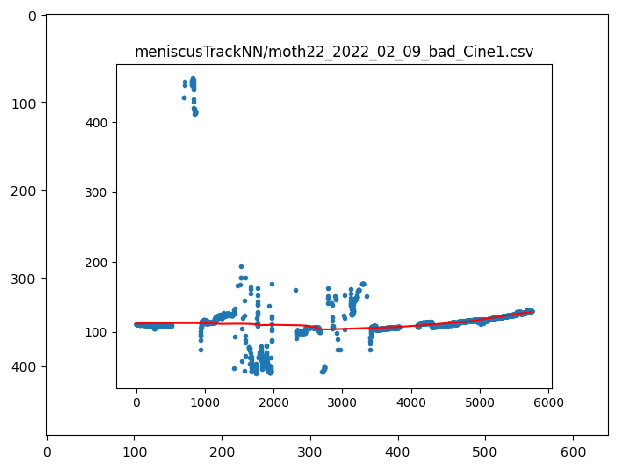

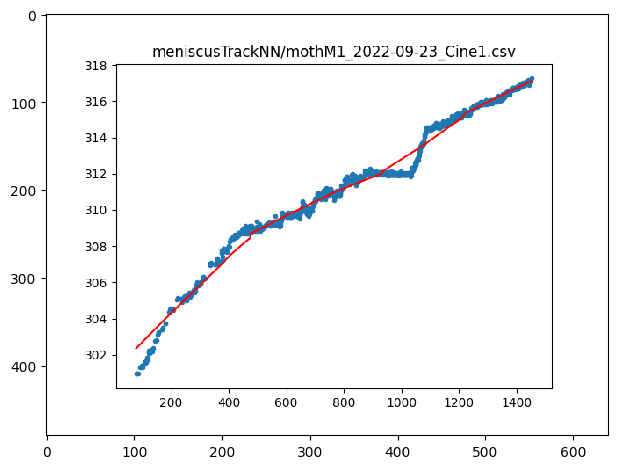

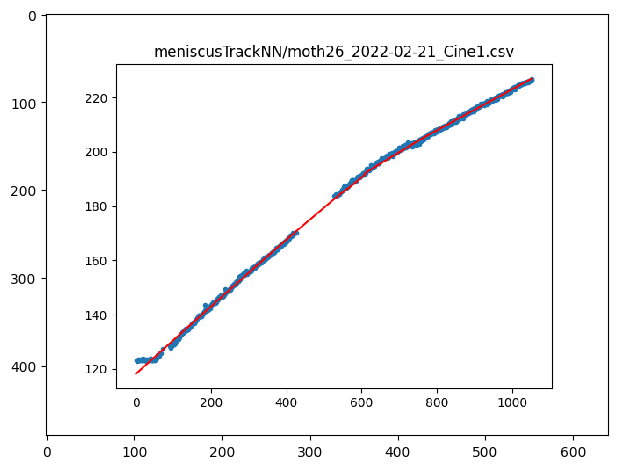

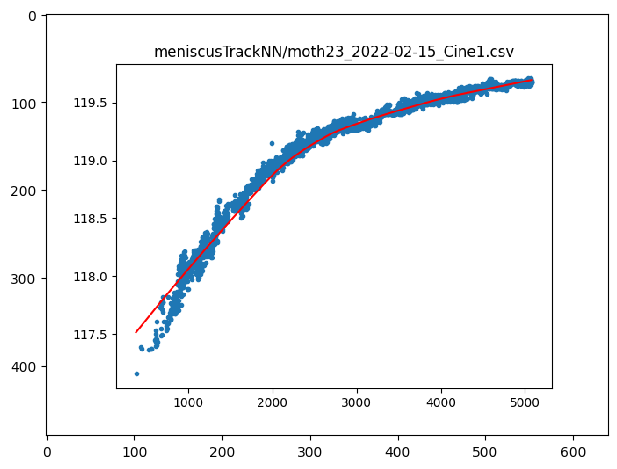

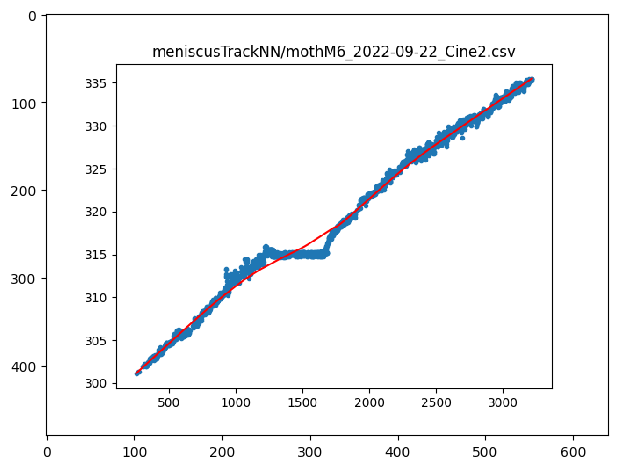

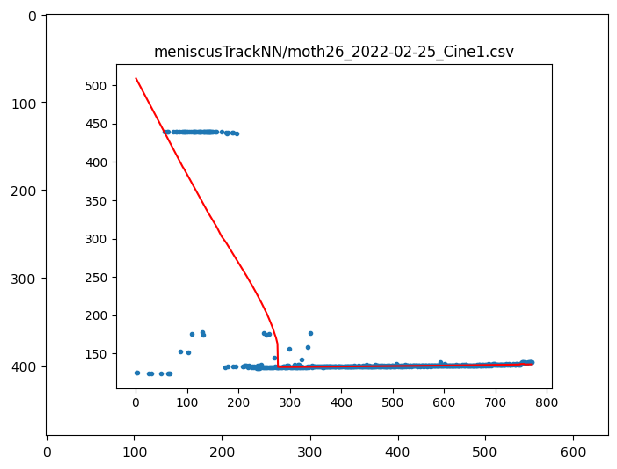

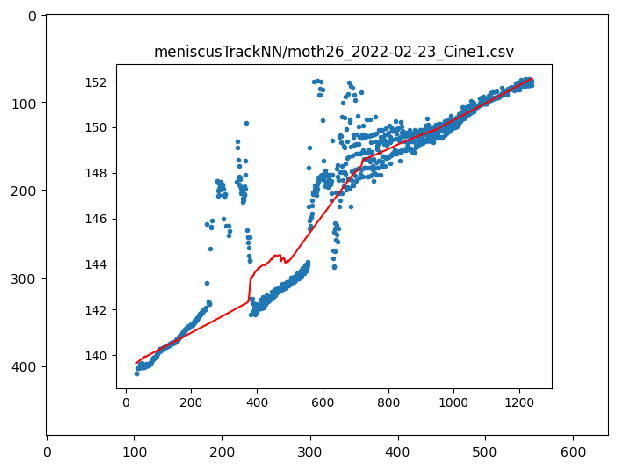

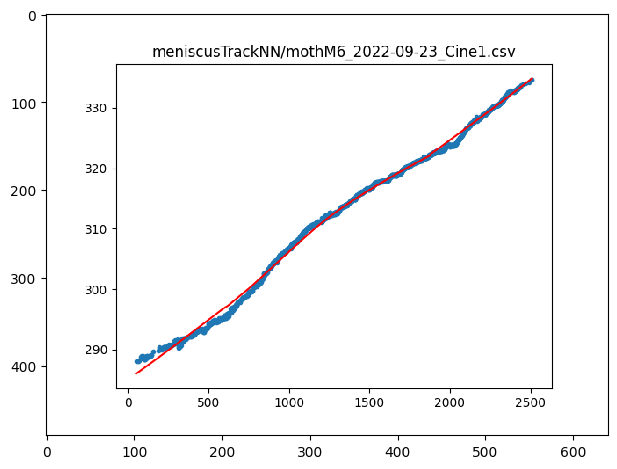

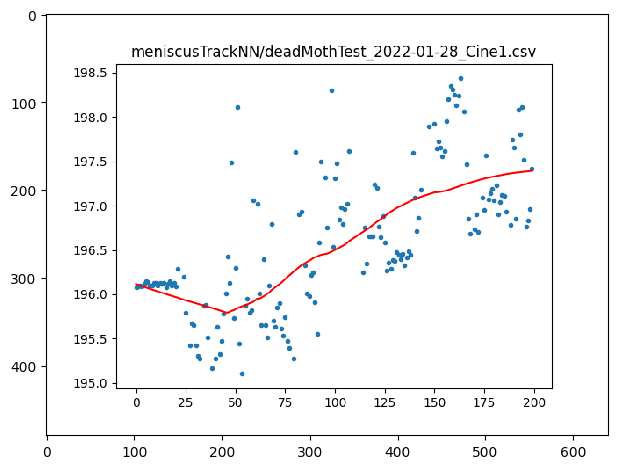

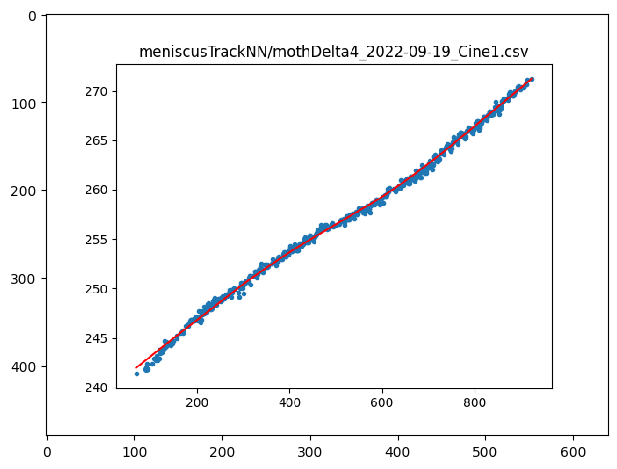

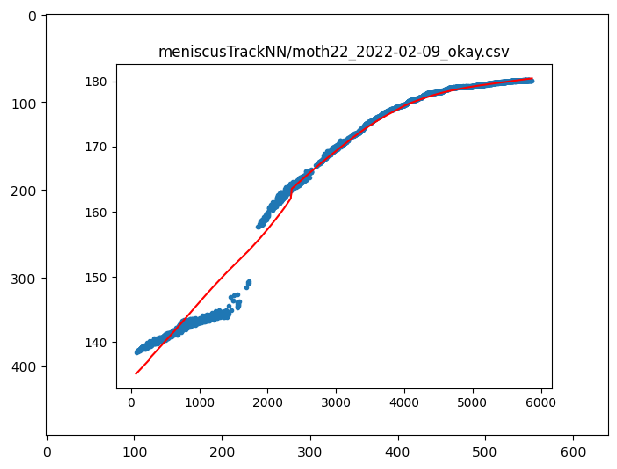

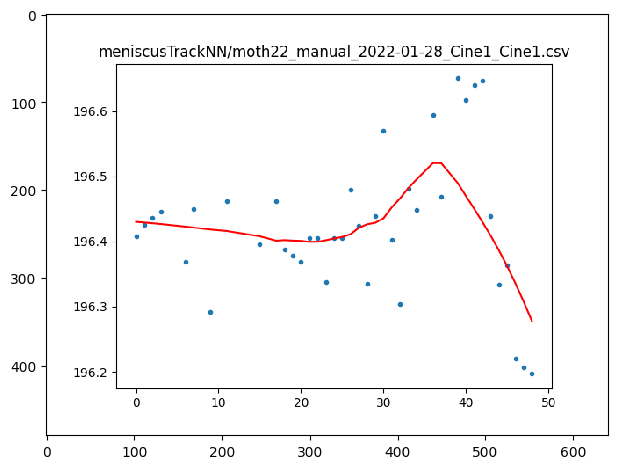

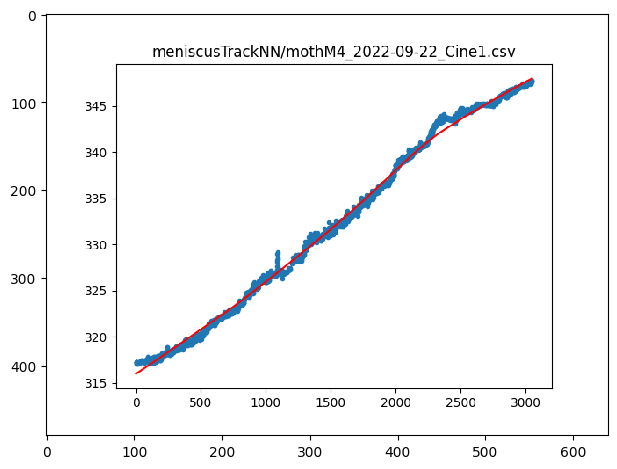

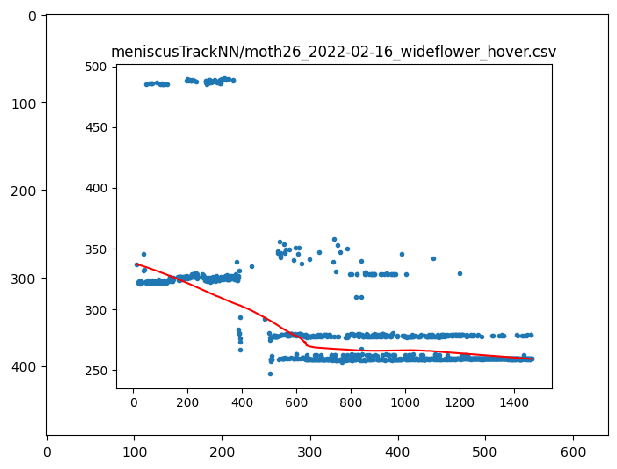

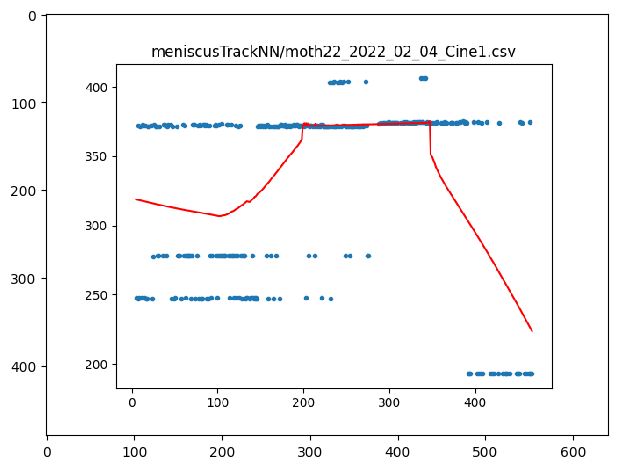

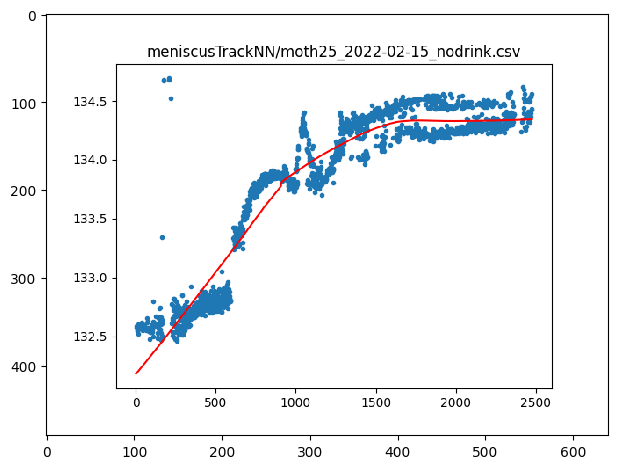

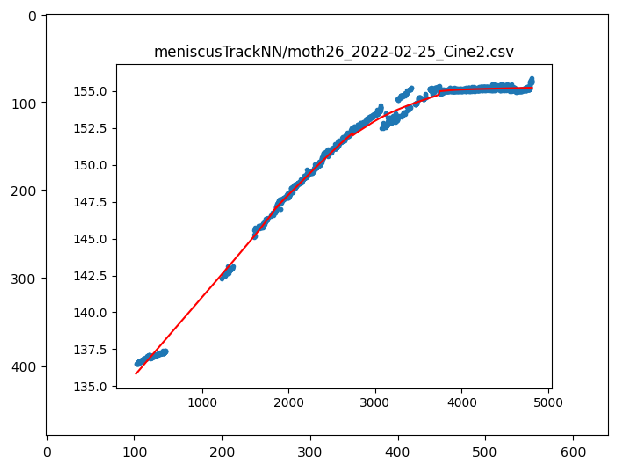

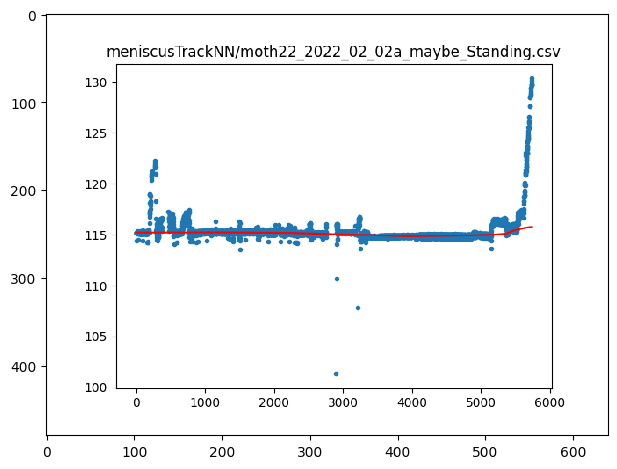

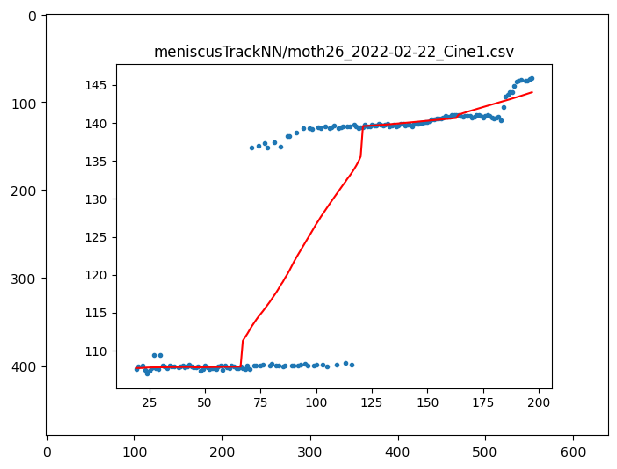

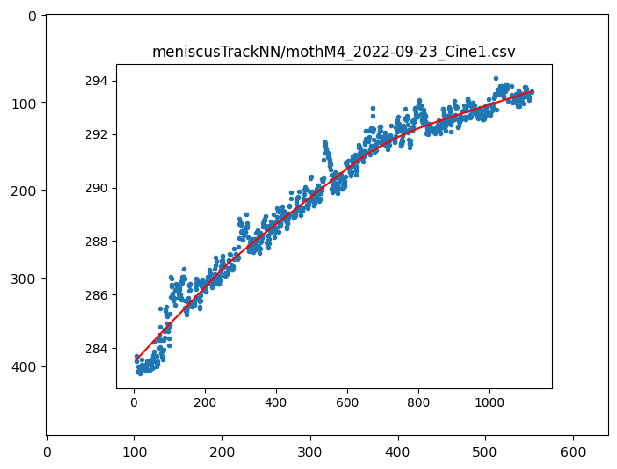

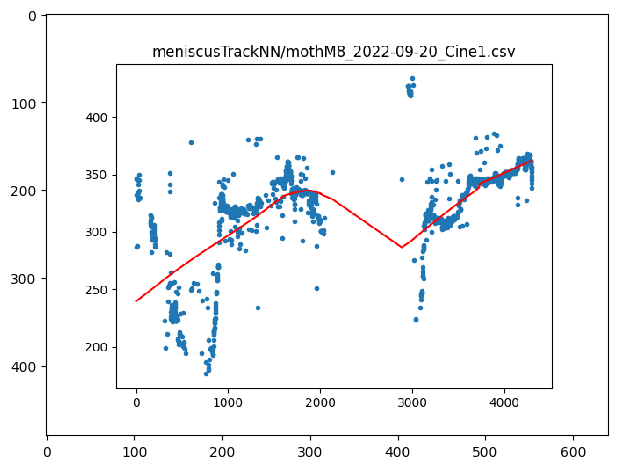

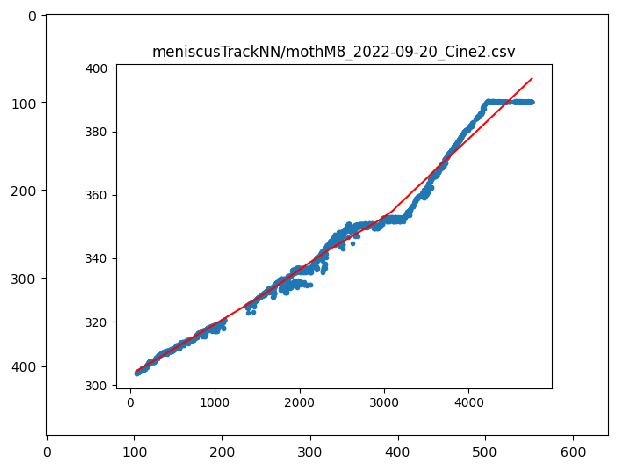

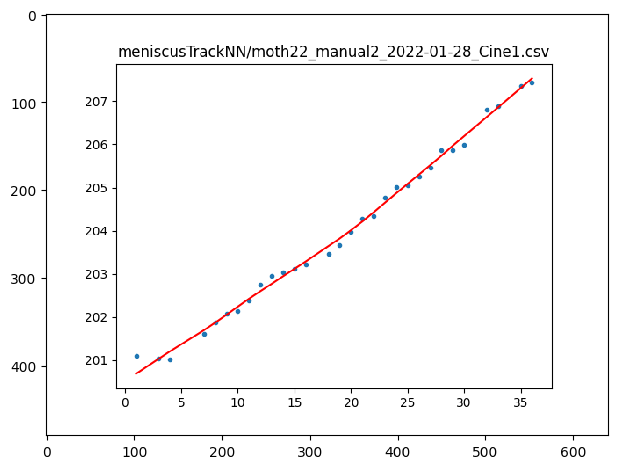

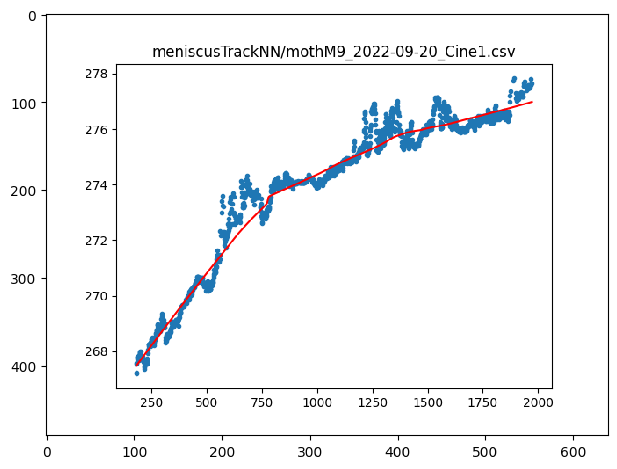

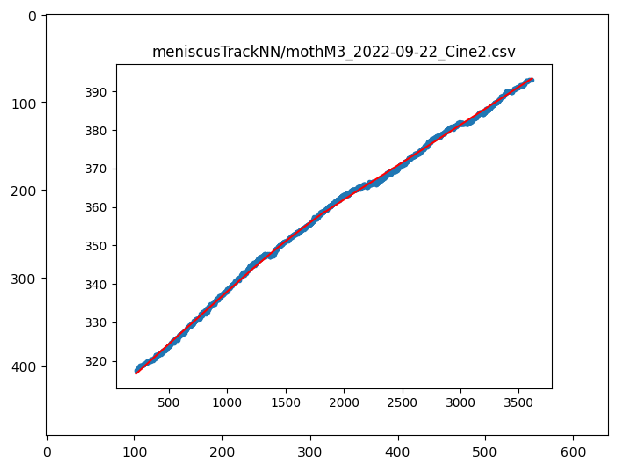

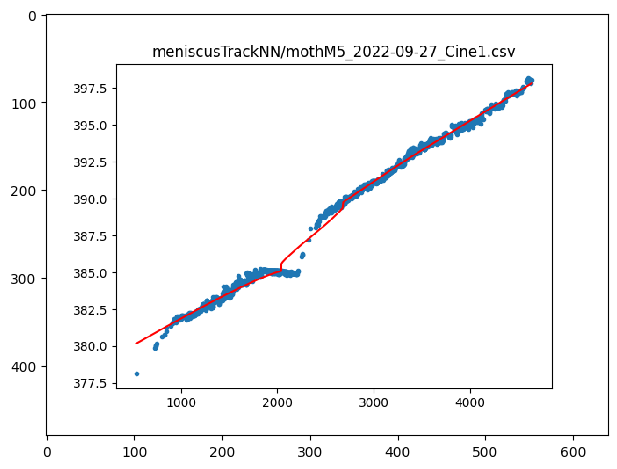

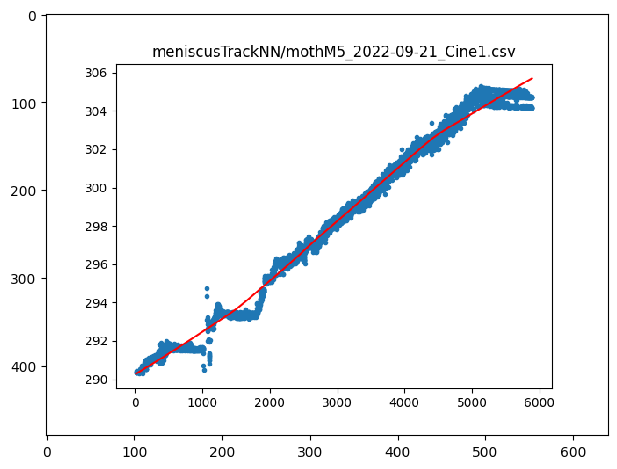

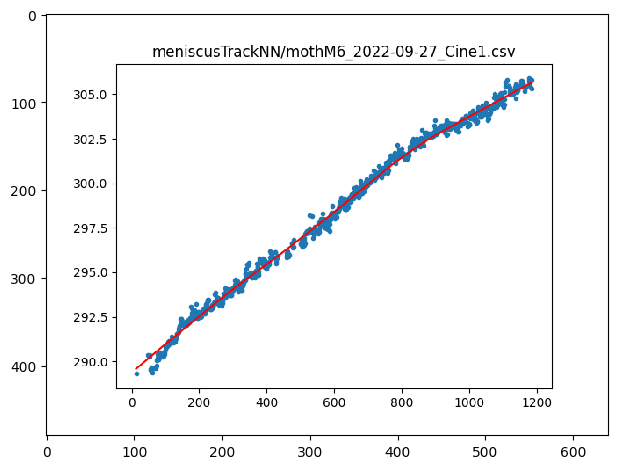

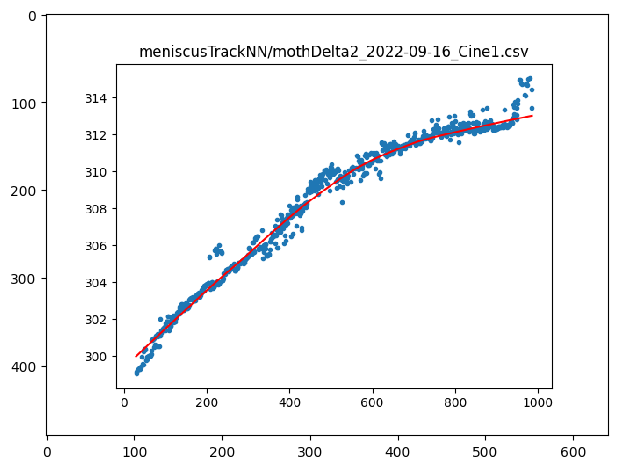

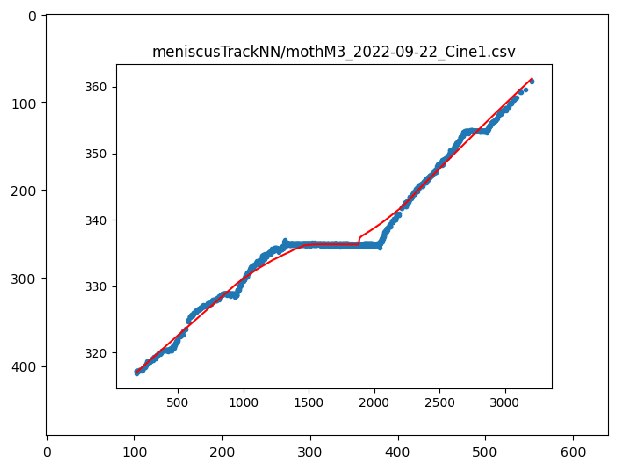

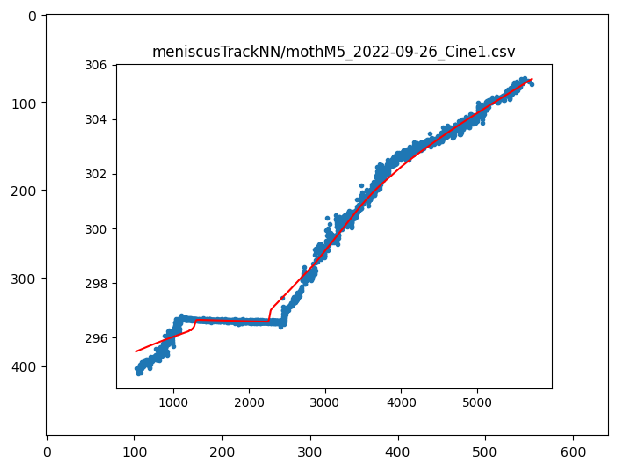

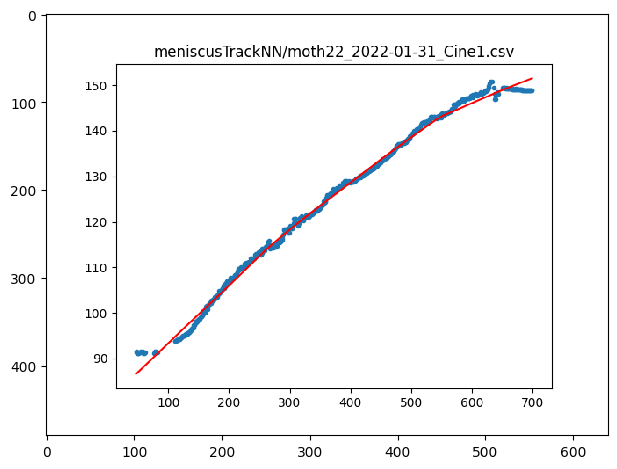

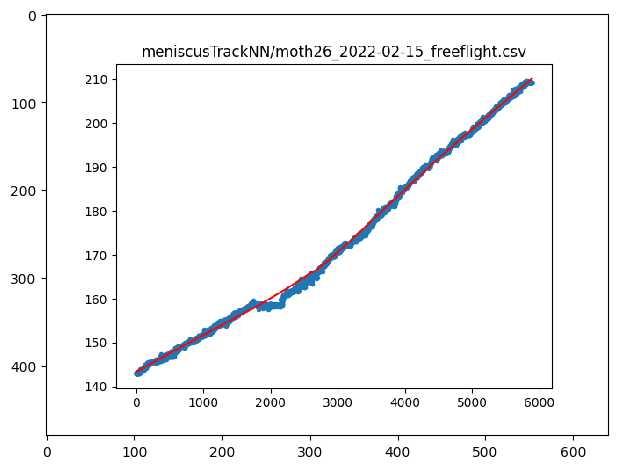

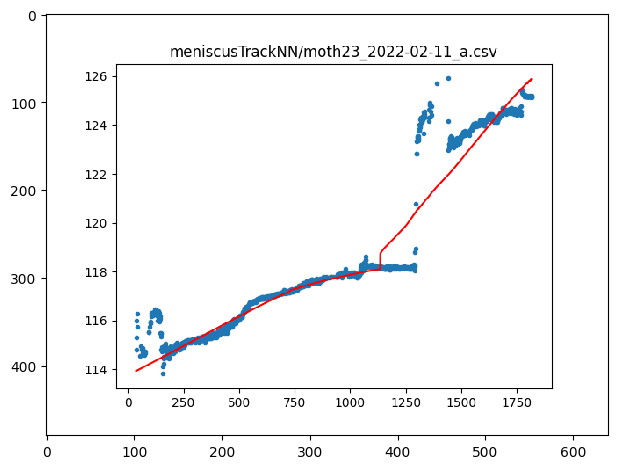

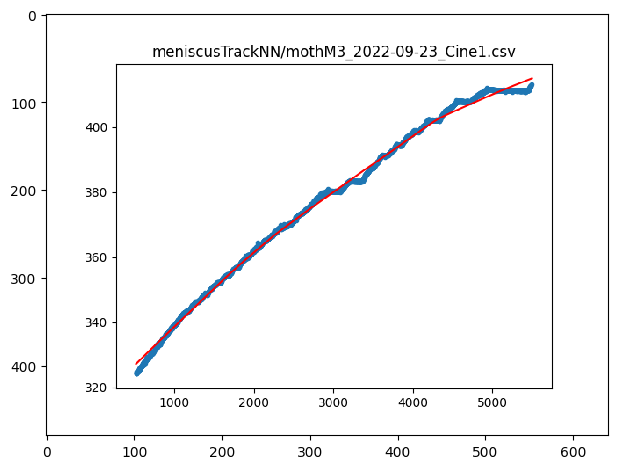

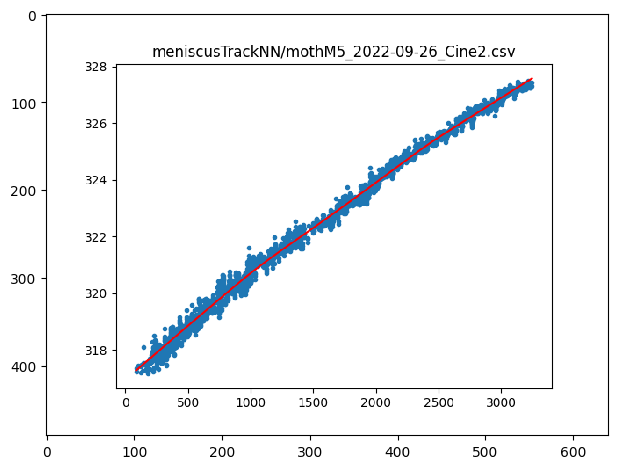

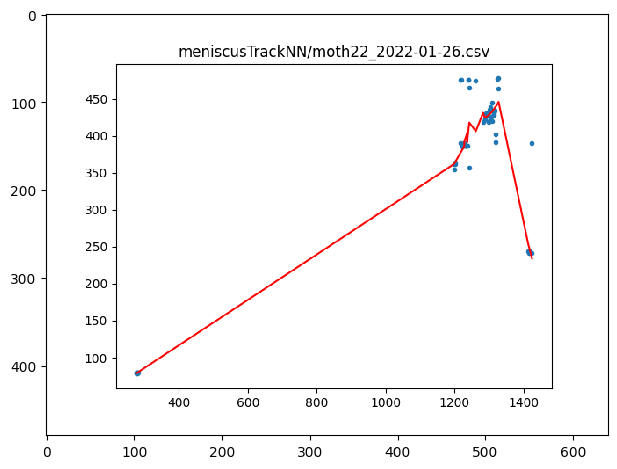

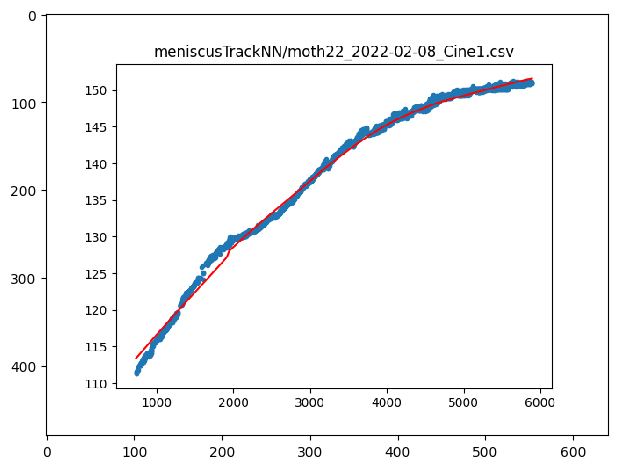

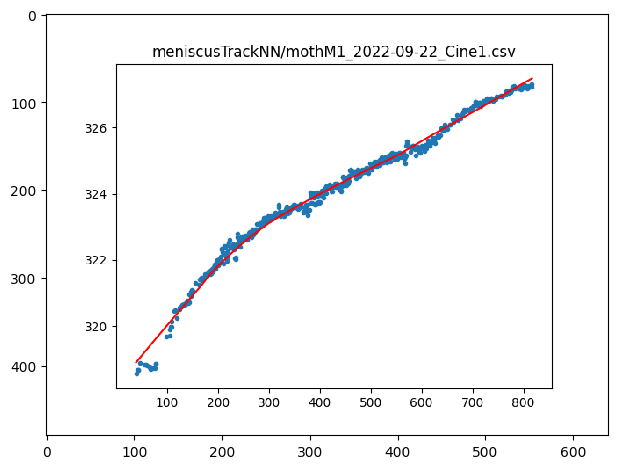

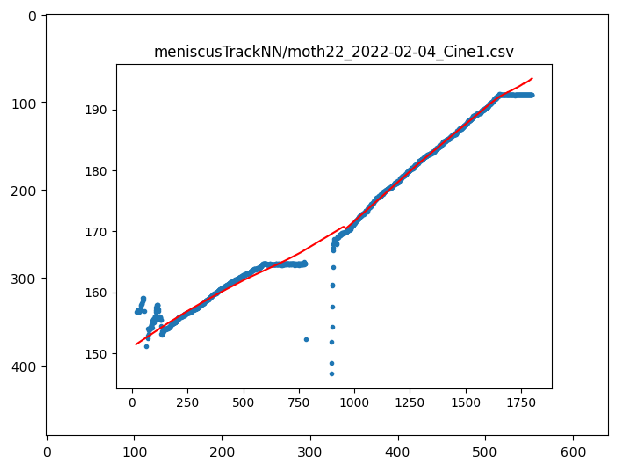

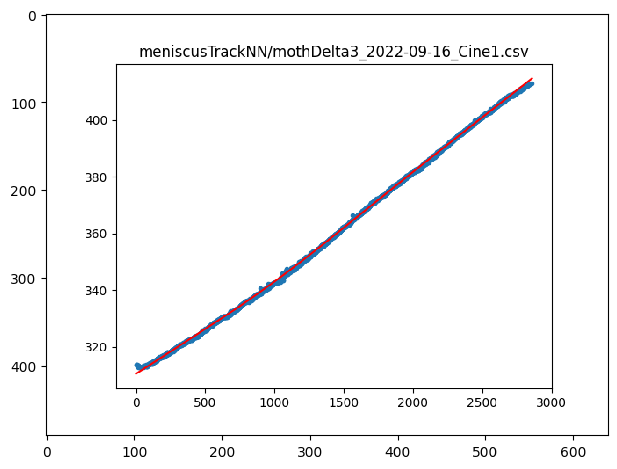

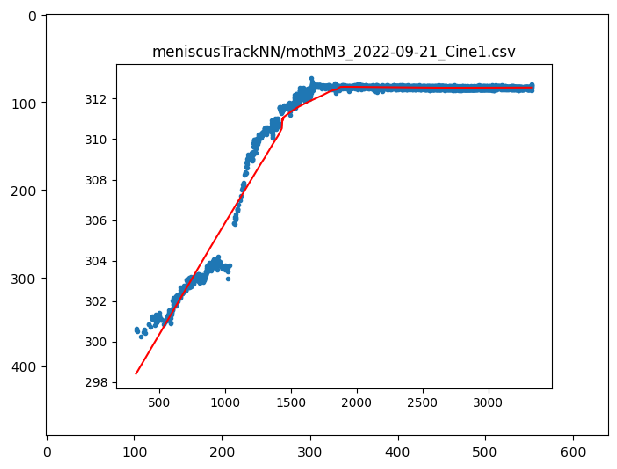

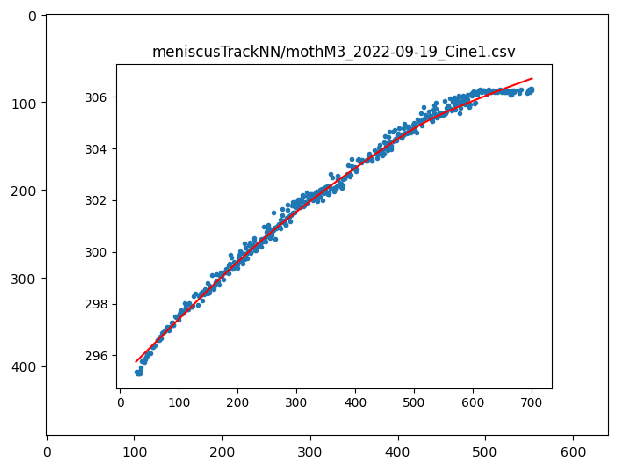

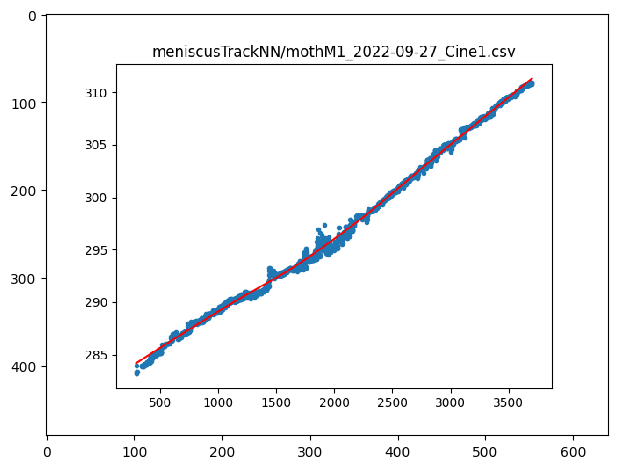

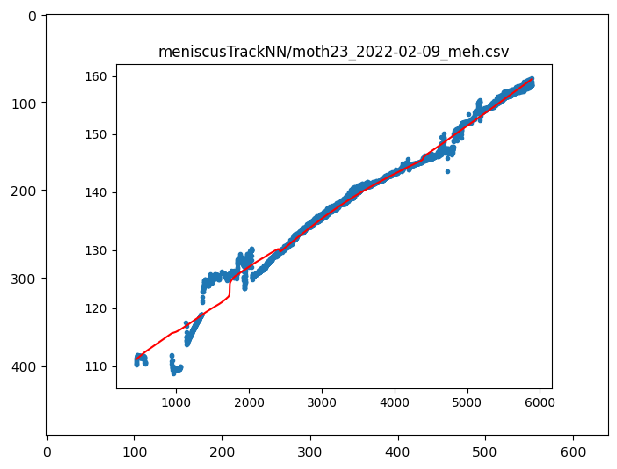

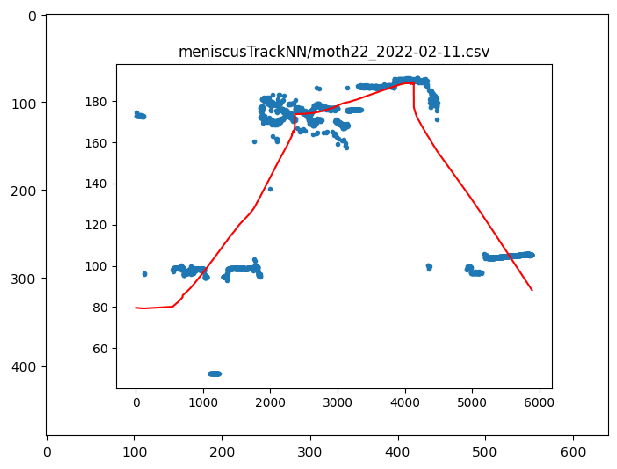

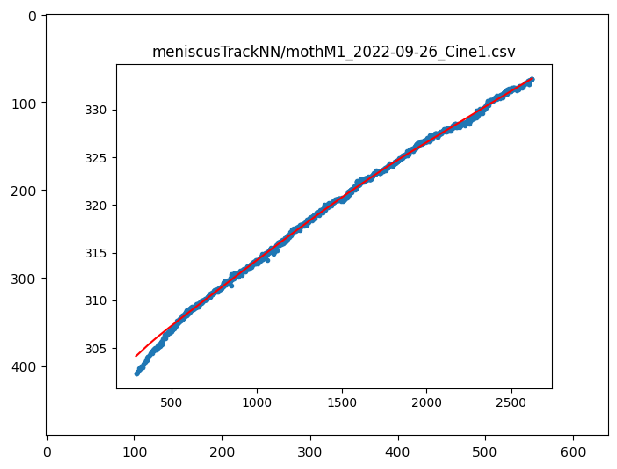

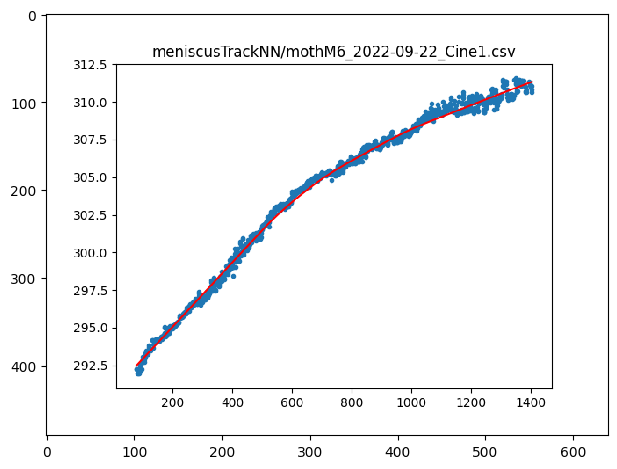

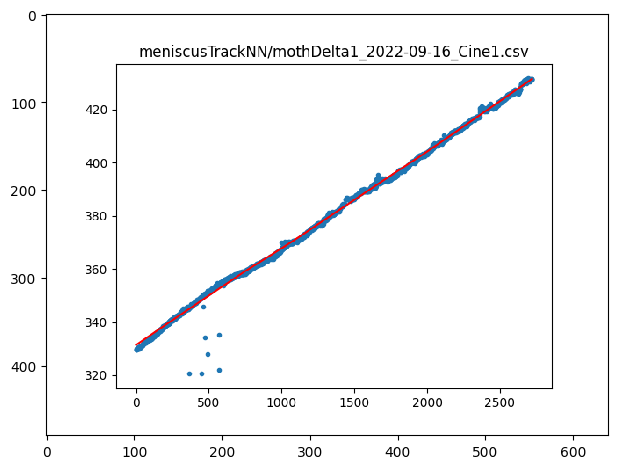

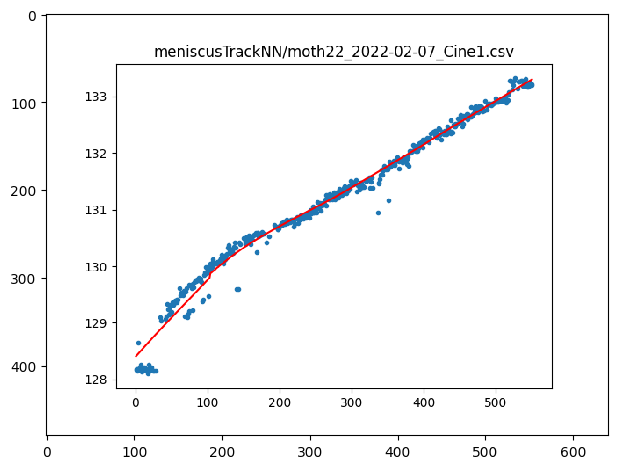

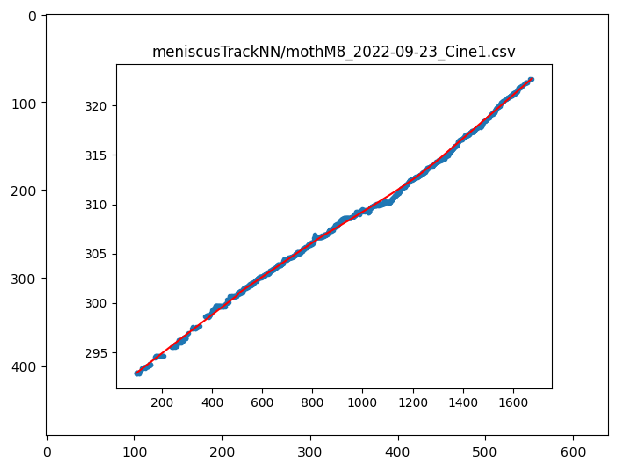

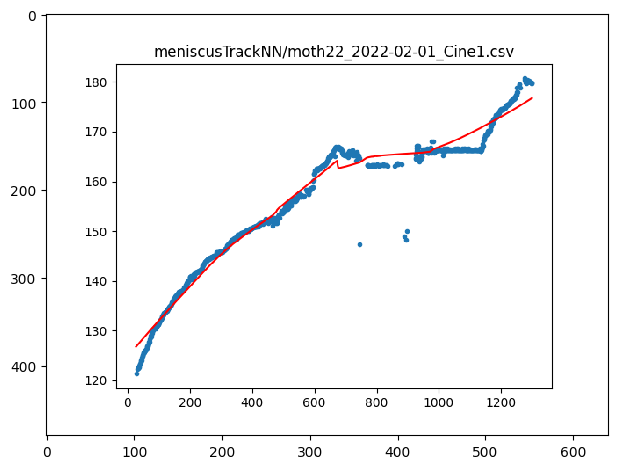

In [3]:
graph_names = glob.glob("meniscusTrackNN/*.png")
for name in graph_names:
    img = skio.imread(name)
    skio.imshow(img)
    pyplot.show()

In [4]:
vid = cine.Cine("data2/moth22_2022-01-26.cine")

![problem figure](meniscusTrackNN/moth22_2022-01-26.png)

In [5]:
b = get_batch(vid, 400)

In [6]:
m_out = model(b)
pred_imgs = m_out.numpy()

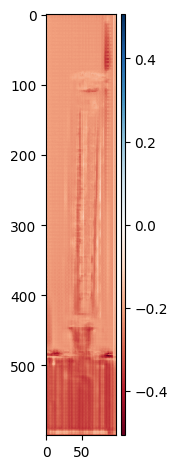

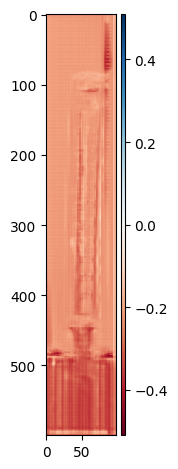

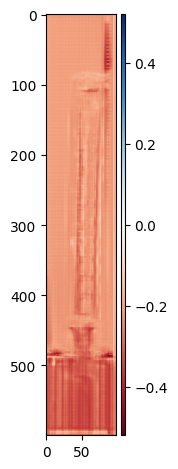

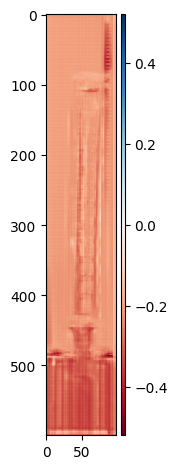

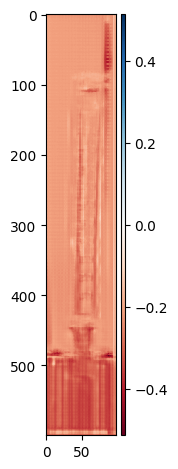

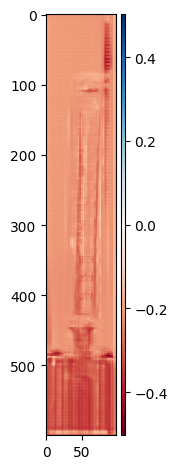

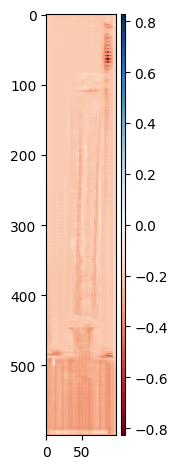

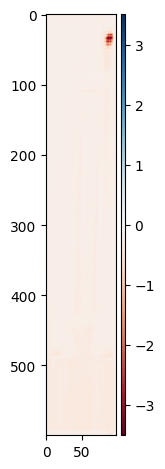

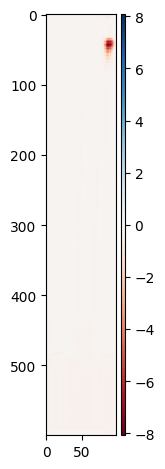

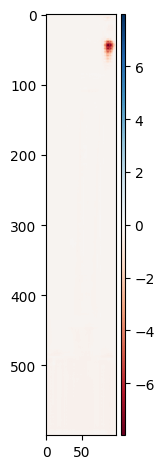

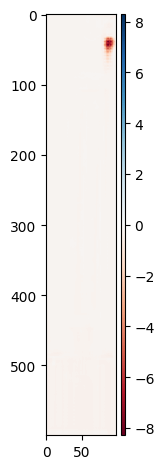

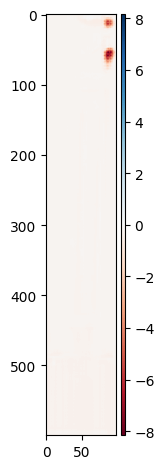

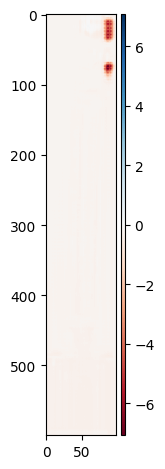

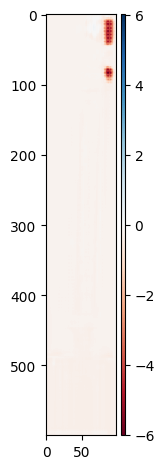

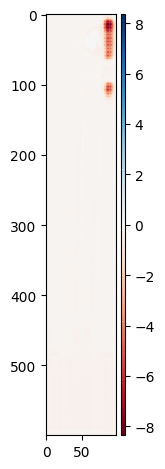

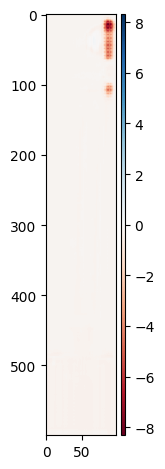

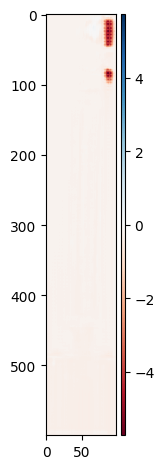

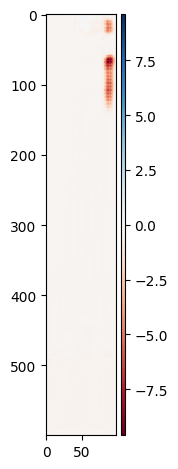

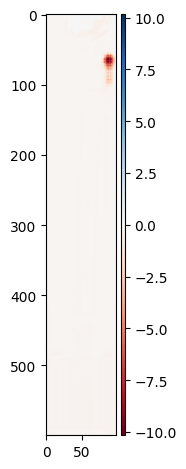

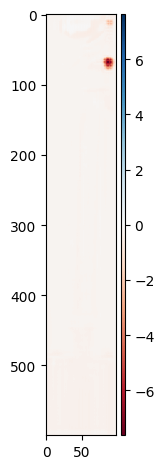

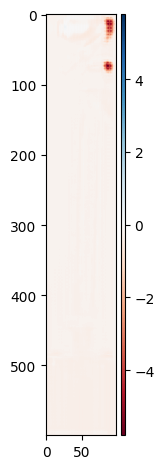

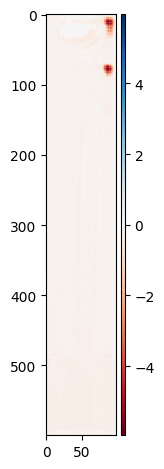

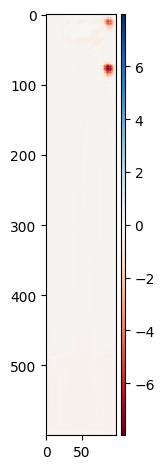

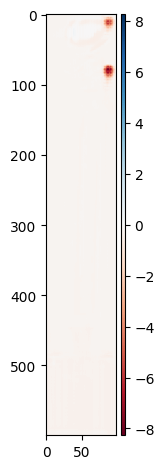

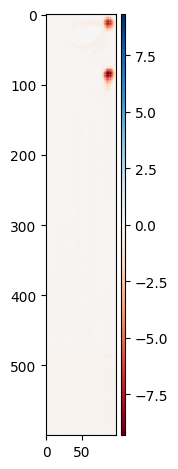

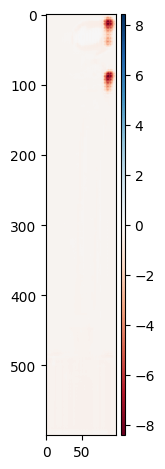

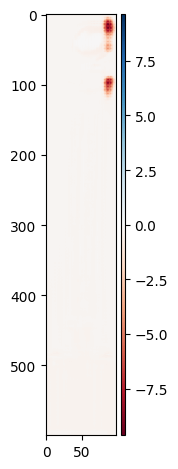

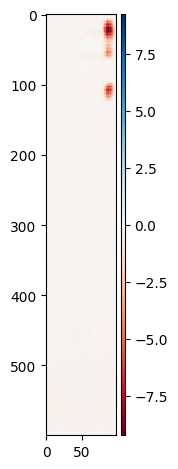

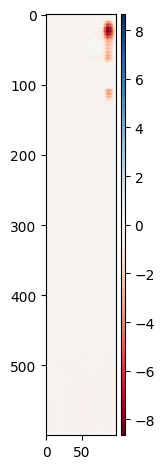

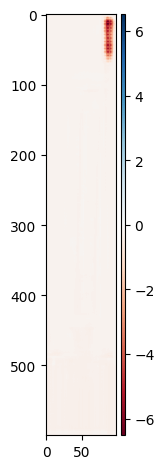

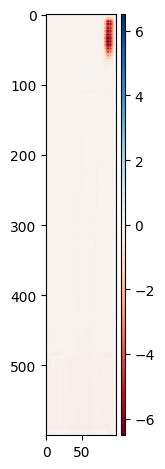

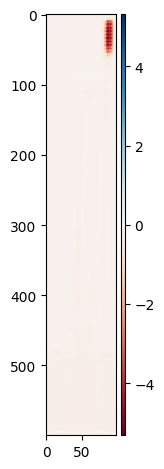

In [8]:
for i in range(32):
    skio.imshow(pred_imgs[i,:,:,0])
    pyplot.show()

In [10]:
vid = cine.Cine("data2/unsuitableVideos/moth22_2022_02_09_bad_Cine1.cine")

In [16]:
b = get_batch(vid,2000 - 32)

In [17]:
m_out = model(b)
pred_imgs = m_out.numpy()

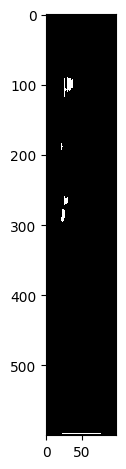

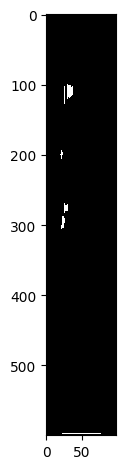

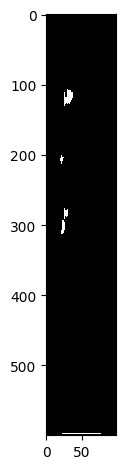

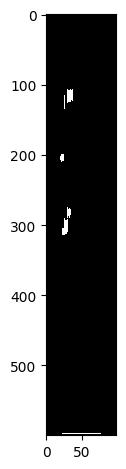

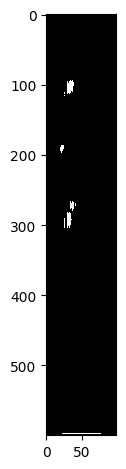

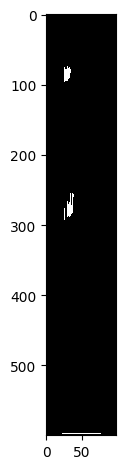

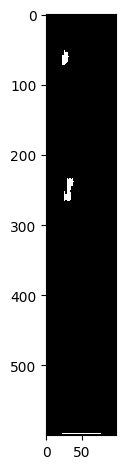

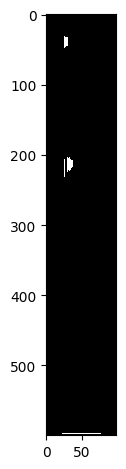

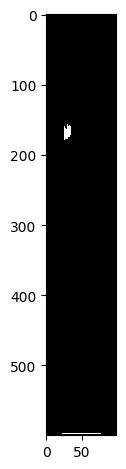

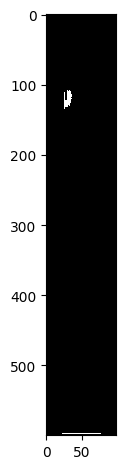

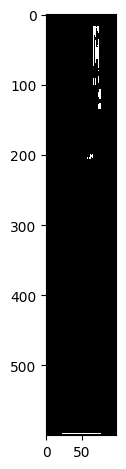

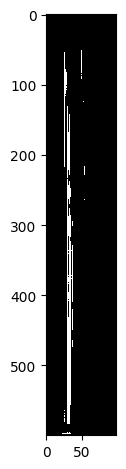

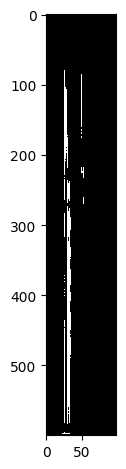

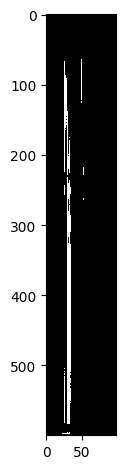

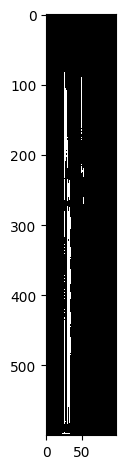

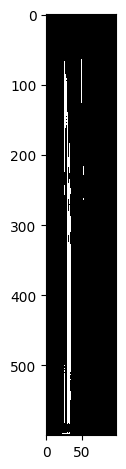

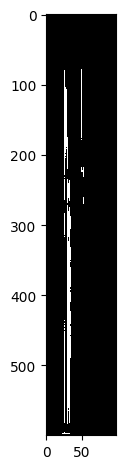

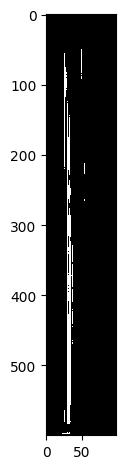

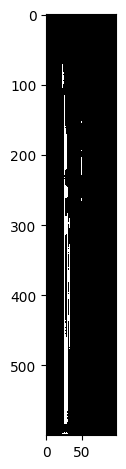

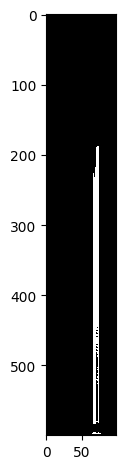

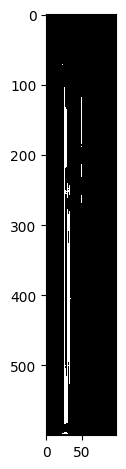

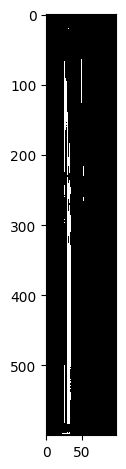

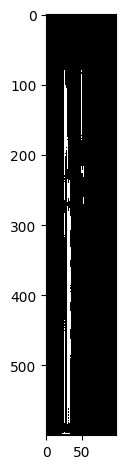

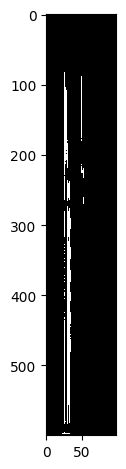

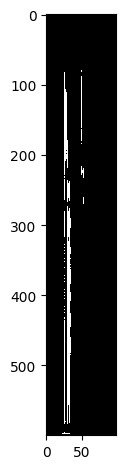

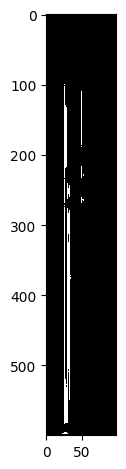

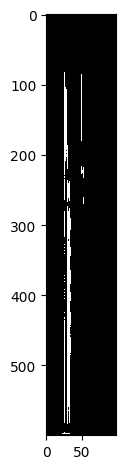

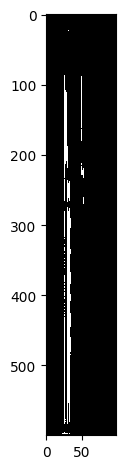

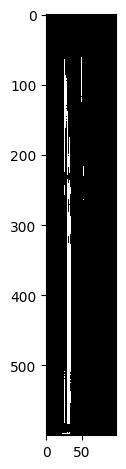

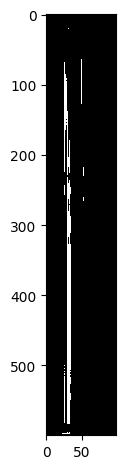

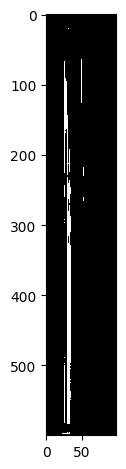

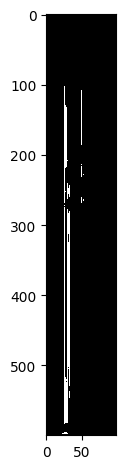

In [19]:
for i in range(32):
    skio.imshow(pred_imgs[i,:,:,0] > 0)
    pyplot.show()

In [21]:
table = np.loadtxt("meniscusTrackNN/moth22_2022_02_09_bad_Cine1.csv", dtype=float,delimiter=' ')

In [22]:
table.shape

(5541, 7)

In [23]:
width = table[:,6] - table[:,4]

In [25]:
t = table[width > 40]

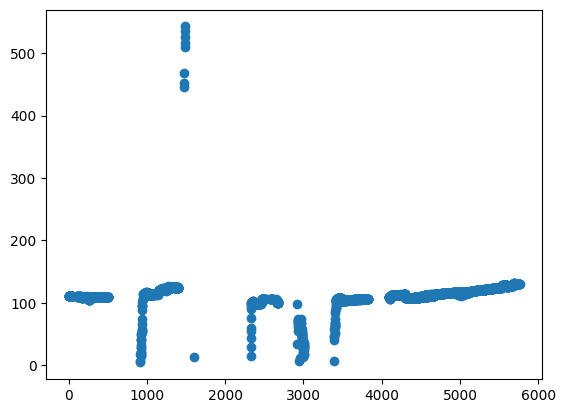

In [27]:
pyplot.scatter(t[:,0],t[:,1])